# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras  # install requirement, keras
import keras  # import the keras library

Using TensorFlow backend.


In [0]:
import numpy as np  # import numpy library, numpy is a powerful N-dimensional array object. Read more at https://numpy.org

# import the required Classes and methods from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# import the mnist module
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# fetch mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # X_train, X_test are array of image data and Y_train, y_test are array of category labels

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


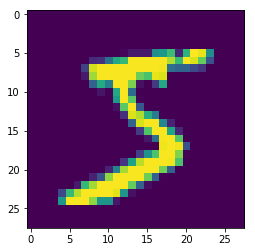

In [0]:
print (X_train.shape)  # print the dimension of X_train array (array of images to train with)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])  # display the 1st image in the training set

In [0]:
# reshape the array of image data from NO_OF_IMAGESX28X28 to NO_OF_IMAGESX28X28X1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# First Model
In the 1st approach, we architect a basic model with 3 blocks. In each block (except the last one) we gradually increase the number of kernels from 16 to 32 to 64 and between blocks try to use max pooling to reduce the no. of layers unless the max pooling layer is very near to the final layer. We are not using max pooling before the final layers because by doing so we might loose some important/trivial feature

In [0]:
from keras.layers import Activation
model = Sequential()

# The input channel dimension is 28X28X1, i.e., the input has 1 channel of size 28X28 pixels
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26
model.add(Convolution2D(32, 3, 3, activation='relu'))  # 24
model.add(Convolution2D(64, 3, 3, activation='relu'))  # 22

model.add(MaxPooling2D(2))  # 11
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))  # 9
model.add(Convolution2D(64, 3, 3, activation='relu'))  # 7

model.add(Convolution2D(10, 1, 1, activation='relu'))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 5
model.add(Convolution2D(10, 3, 3, activation='relu'))  # 3
model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

In [0]:
# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        1040      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)         

In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# train the model (with training data set), with batch size = 32, for 20 epochs
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/20





60000/60000 [==============================] - 34s 568us/step - loss: 0.2465 - acc: 0.9237
Epoch 2/20
60000/60000 [==============================] - 27s 443us/step - loss: 0.0837 - acc: 0.9746
Epoch 3/20
60000/60000 [==============================] - 27s 442us/step - loss: 0.0643 - acc: 0.9804
Epoch 4/20
60000/60000 [==============================] - 27s 443us/step - loss: 0.0499 - acc: 0.9848
Epoch 5/20
60000/60000 [==============================] - 27s 457us/step - loss: 0.0445 - acc: 0.9862
Epoch 6/20
60000/60000 [==============================] - 28s 462us/step - loss: 0.0388 - acc: 0.9884
Epoch 7/20
60000/60000 [==============================] - 28s 467us/step - loss: 0.0344 - acc: 0.9895
Epoch 8/20
60000/60000 [==============================] - 28s 464us/step - loss: 0.0313 - acc: 0.9897
Epoch 9/20
60000/60000 [==============================] - 28s 465us/step - loss: 0.0270 - acc: 0.9911
Epoch 10/20
60000/60000 [==============================] - 28s 464us/step 

In [0]:
# Evaluate the model with validation data set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)  # Print the model accuracy on validation data set

[0.05106720582045455, 0.989]


### After running the model for 20 epochs, we see the following

*   Training accuracy: 99.52%
*   Validation accuracy: 98.9% **(we want this to be 99.4%)**

### Also notice that the number of parameters is 50852, we want this number to be less than 20000. So let's try to fix that first in our next model



# Second Model

In this approach, we use the same architecture as that of the previous one but try to avoid higher number of kernels in any layer so that the total number of parameters can be reduced

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26
model.add(Convolution2D(16, 3, 3, activation='relu'))  # 24
model.add(Convolution2D(32, 3, 3, activation='relu'))  # 22

model.add(MaxPooling2D(2))  # 11
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))  # 9
model.add(Convolution2D(16, 3, 3, activation='relu'))  # 7

model.add(Convolution2D(10, 1, 1, activation='relu'))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 5
model.add(Convolution2D(10, 3, 3, activation='relu'))  # 3
model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/

In [0]:
# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 16)        528       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 16)         

### Well we were able to reach our goal of reducing the number of parameters to less than 20000. Now, let's train the model and check the accuracy

In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# Train the model (with training data set), with batch size = 32, for 20 epochs.
# Also note that we are also checking the validation accuracy in each epoch. The result of this will not be added to back propagation 
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  448/60000 [..............................] - ETA: 24s - loss: 0.0207 - acc: 0.9911

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 24s 408us/step - loss: 0.0188 - acc: 0.9935 - val_loss: 0.0404 - val_acc: 0.9887
Epoch 2/20
60000/60000 [==============================] - 25s 412us/step - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0409 - val_acc: 0.9890
Epoch 3/20
60000/60000 [==============================] - 24s 408us/step - loss: 0.0176 - acc: 0.9940 - val_loss: 0.0367 - val_acc: 0.9899
Epoch 4/20
60000/60000 [==============================] - 24s 407us/step - loss: 0.0168 - acc: 0.9947 - val_loss: 0.0383 - val_acc: 0.9884
Epoch 5/20
60000/60000 [==============================] - 24s 408us/step - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0372 - val_acc: 0.9896
Epoch 6/20
60000/60000 [==============================] - 24s 407us/step - loss: 0.0152 - acc: 0.9951 - val_loss: 0.0390 - val_acc: 0.9901
Epoch 7/20
60000/60000 [==============================] - 24s 408us/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0335 - val_acc: 0.9909
Epoch 8/20
60000/60000 [==============

### After running the model for 20 epochs, we can see the following in Epoch# 12

*   Training accuracy: 99.58%
*   Validation accuracy: 99.12%

### We still haven't reach our goal of 99.4% of validation accuracy under 20000 parameters. Let's try to fix this in our next model

# Third Model

In this approach, we use the same model as that of the previous one and add Batch Normalization after every Convolution layer except the last one

In [0]:
from keras.layers import Activation
from keras.layers import BatchNormalization
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))  # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu'))  # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(2))  # 11
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))  # 9
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))  # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 5
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu'))  # 3
model.add(BatchNormalization())
model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Upd

In [0]:
# Display the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)       

### Notice that by adding Batch Normalization we have increased the number of parameters by a little than the previous model, but we are still below 20000. 

### Also notice that Batch Normalization has introduced a new type of parameters, Non-trainable parameters.

In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# Train the model (with training data set), with batch size = 32, for 20 epochs.
# Also note that we are also checking the validation accuracy in each epoch. The result of this will not be added to back propagation 
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 45s 750us/step - loss: 0.2562 - acc: 0.9220 - val_loss: 0.0671 - val_acc: 0.9775
Epoch 2/20
60000/60000 [==============================] - 43s 711us/step - loss: 0.0671 - acc: 0.9793 - val_loss: 0.0576 - val_acc: 0.9827
Epoch 3/20
60000/60000 [==============================] - 43s 709us/step - loss: 0.0510 - acc: 0.9843 - val_loss: 0.0449 - val_acc: 0.9860
Epoch 4/20
60000/60000 [==============================] - 43s 715us/step - loss: 0.0447 - acc: 0.9860 - val_loss: 0.0428 - val_acc: 0.9865
Epoch 5/20
60000/60000 [==============================] - 43s 710us/step - loss: 0.0382 - acc: 0.9880 - val_loss: 0.0619 - val_acc: 0.9823
Epoch 6/20
60000/60000 [==============================] - 42s 707us/step - loss: 0.0360 - acc: 0.9888 - val_loss: 0.0432 - val_acc: 0.9872
Epoch 7/20
60000/60000 [==============================] - 43s 711us/step - loss: 0.0314 - acc: 0.9895 - val_loss: 0.

### After running the model for 20 epochs, we can see the following in Epoch# 20

*   Training accuracy: 99.55%
*   Validation accuracy: 99.20%

### Although we have added Batch Normalization we don't see a significant improvement over our previous model since we are using MNIST dataset, but there is some amount of improvement, although We are yet to reach our goal of 99.4% on validation accuracy.

### Also if you notice, for most of epochs there is a good amount of difference between the training accuracy and validation accuracy E.g., `Epoch#17: 0.49%`, `Epoch#18: 0.51%`, `Epoch19: 0.44%`, etc., also the training accuracy is always higher than the validation accuracy. 

### It seems the model could be overfitting. Let's try to reduce the gap and also fix the issue of training accuracy being always higher than the validation accuracy in our next model

# 4th Model

In this approach, we use the same model as that of the previous one and add dropouts. Now we are not sure where to add dropouts, hence we add them after every convolution layer (except may be the last one) but with a very smaller value `0.1`

In [0]:
from keras.layers import Activation
from keras.layers import BatchNormalization
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))  # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu'))  # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(2))  # 11

model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))  # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))  # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

# Display the model summary
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` cal

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_28 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_5 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_29 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 22, 22, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


### Notice that by adding dropouts we haven't changed the number of parameters and it is same as that of the previous model

In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# Train the model (with training data set), with batch size = 32, for 15 epochs.
# Also note that we are also checking the validation accuracy in each epoch. The result of this will not be added to back propagation 
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1, validation_data=(X_test, Y_test), )

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
  224/60000 [..............................] - ETA: 51s - loss: 0.0772 - acc: 0.9821

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 48s 801us/step - loss: 0.0378 - acc: 0.9883 - val_loss: 0.0237 - val_acc: 0.9929
Epoch 2/15
60000/60000 [==============================] - 48s 799us/step - loss: 0.0367 - acc: 0.9885 - val_loss: 0.0258 - val_acc: 0.9924
Epoch 3/15
60000/60000 [==============================] - 48s 799us/step - loss: 0.0354 - acc: 0.9894 - val_loss: 0.0261 - val_acc: 0.9921
Epoch 4/15
60000/60000 [==============================] - 48s 802us/step - loss: 0.0370 - acc: 0.9881 - val_loss: 0.0211 - val_acc: 0.9937
Epoch 5/15
60000/60000 [==============================] - 48s 808us/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0232 - val_acc: 0.9922
Epoch 6/15
60000/60000 [==============================] - 48s 796us/step - loss: 0.0336 - acc: 0.9898 - val_loss: 0.0211 - val_acc: 0.9930
Epoch 7/15
60000/60000 [==============================] - 48s 803us/step - loss: 0.0326 - acc: 0.9900 - val_loss: 0.0244 - val_acc: 0.9928
Epoch 8/15
60000/60000 [==============

### After running the model for 15 epochs, We can clearly see that the 'overfitted model' discussed in the previous model is no more visible, i.e., there might still be some gap between training accuracy and validation accuracy but we have fixed the issue of 'training accuracy being always higher than the validation accuracy'

### Also if you notice we have already reached our desired validation accuracy at `Epoch#11` and `Epoch#12`. But let's add smaller learning rates and see how that can also help in further improving the validation accuracy.

# 5th Model

In this approach, we use the exact same model as that of the previous one but introduce smaller learning rates while training. Initially the learning rate will be set to `0.001`, which will gradually decrease

In [0]:
from keras.layers import Activation
from keras.layers import BatchNormalization
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))  # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu'))  # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(2))  # 11

model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))  # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))  # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

# Display the model summary
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` cal

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_14 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_38 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 22, 22, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.001 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=512, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
60000/60000 [==============================] - 15s 250us/step - loss: 0.0243 - acc: 0.9920 - val_loss: 0.0233 - val_acc: 0.9927
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0007581501.
60000/60000 [==============================] - 9s 146us/step - loss: 0.0228 - acc: 0.9928 - val_loss: 0.0233 - val_acc: 0.9931
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0006105006.
60000/60000 [==============================] - 9s 147us/step - loss: 0.0204 - acc: 0.9931 - val_loss: 0.0220 - val_acc: 0.9939
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0005109862.
60000/60000 [==============================] - 9s 147us/step - loss: 0.0188 - acc: 0.9937 - val_loss: 0.0207 - val_acc: 0.9938
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0004393673.
60000/60000 [=====

### After adding smaller learning rates we can see that we already reached our desired validation accuracy at `Epoch#5 itself` (and onwards). Also we can see that the gap between training and validation accuracy is quite negligible now in all the epochs

# 6th Model

Although we have reached our desired goal in the previous two models, but lets try if we can reduce the parameters further and still maintain the same validation accuracy

In [0]:
from keras.layers import Activation
from keras.layers import BatchNormalization
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))  # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(2))  # 11

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu'))  # 3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

# Display the model summary
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` cal

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_73 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_50 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_74 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_51 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 22, 22, 16)      

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=512, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
60000/60000 [==============================] - 6s 107us/step - loss: 0.0442 - acc: 0.9864 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0075815011.
60000/60000 [==============================] - 6s 104us/step - loss: 0.0376 - acc: 0.9877 - val_loss: 0.0273 - val_acc: 0.9902
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0061050061.
60000/60000 [==============================] - 6s 104us/step - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0240 - val_acc: 0.9923
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.005109862.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0288 - acc: 0.9906 - val_loss: 0.0201 - val_acc: 0.9938
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0043936731.
60000/60000 [========

### We have reached our desired validation accuracy of 99.4% in `Epoch#13` and onwards 
### We have also learnt that the approaches discussed in the above models is capable in achieving the desired validation accuracy with less than 8000 parameters also.